# MODEL TRAINER

## 1.1 IMPORT DATA AND REQUIRED PACKAGES

In [10]:

import sys
!{sys.executable} -m pip install catboost xgboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
    --------------------------------------- 1.6/102.4 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 2.4/102.4 MB 4.5 MB/s eta 0:00:23
   - -------------------------------------- 3.7/102.4 MB 4.2 MB/s eta 0:00:24
   - -------------------------------------- 4.5/102.4 MB 4.1 MB/s eta 0:00:24
   -- ------------------------------------- 5.2/102.4 MB 4.0 MB/s eta 0:00:25
   -- ------------------------------------- 6.0/102.4 MB 4.0 MB/s eta 0:00:25
   -- ------------------------------------- 7.1/102.4 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 8.1/102.4 MB 4.1 MB/s eta 0:00:24
   --- ------------------------------------ 8.9/102.4 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 9.4/102.4 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 10.2/102.4 MB 3.8 MB/s eta 0:00:25

In [11]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regressor models from Scikit-Learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Model evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Gradient Boosting Libraries (external)
from catboost import CatBoostRegressor
from xgboost import XGBRegressor



## 1.2 IMPORT  CSV DATA AS PANDA DATA FRAME


In [7]:
df = pd.read_csv('stud.csv')


## SHOW TOP  5 RECORDS


In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## PREPARING X AND Y VARIABLES

In [10]:
X= df.drop(columns=['math score'],axis=1)

In [11]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y = df['math score']

In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [15]:
# Create column transformer with 2 types of transformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("onehotencoder", categorical_transformer, cat_features),
        ("standardscaler", numeric_transformer, num_features)
    ]
)

In [16]:
x = preprocessor.fit_transform(X)

In [17]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

## CREATE AN EVALUATE FUNCTION TO GIVE ALL METRICS AFTER MODEL TRAINING

**Purpose:**
This function calculates and prints key metrics to evaluate how well your machine learning model predicts results.

**How it works:**
You pass the true values and predicted values to the function. It prints each metric and returns them as a tuple for further use.

In [19]:
def evaluate_model(true,  predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)  
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    return mae, mse, rmse, r2

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor(eval_metric='rmse', verbosity=0)
}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on train and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Store results
    model_list.append(model_name)
    r2_list.append(round(test_r2, 2))
    
    # Print formatted output
    print(f"\nModel: {model_name}")
    print(f"Train MAE (Mean Absolute Error): {train_mae:.2f}")
    print(f"Train MSE (Mean Squared Error): {train_mse:.2f}")
    print(f"Train RMSE (Root Mean Squared Error): {train_rmse:.2f}")
    print(f"Train R2 (R-squared): {train_r2:.2f}")
    print(f"Test MAE (Mean Absolute Error): {test_mae:.2f}")
    print(f"Test MSE (Mean Squared Error): {test_mse:.2f}")
    print(f"Test RMSE (Root Mean Squared Error): {test_rmse:.2f}")
    print(f"Test R2 (R-squared): {test_r2:.2f}")

MAE: 4.272265625
MSE: 28.5175634765625
RMSE: 5.340183842955456
R2: 0.8735068463594741
MAE: 4.2253125
MSE: 29.39126953125
RMSE: 5.421371554436202
R2: 0.8792164757750934

Model: LinearRegression
Train MAE (Mean Absolute Error): 4.27
Train MSE (Mean Squared Error): 28.52
Train RMSE (Root Mean Squared Error): 5.34
Train R2 (R-squared): 0.87
Test MAE (Mean Absolute Error): 4.23
Test MSE (Mean Squared Error): 29.39
Test RMSE (Root Mean Squared Error): 5.42
Test R2 (R-squared): 0.88
MAE: 4.26498782372598
MSE: 28.337788233082442
RMSE: 5.323324922741654
R2: 0.8743042615212909
MAE: 4.211100688014259
MSE: 29.056272192348274
RMSE: 5.3903870169356365
R2: 0.8805931485028738

Model: Ridge
Train MAE (Mean Absolute Error): 4.26
Train MSE (Mean Squared Error): 28.34
Train RMSE (Root Mean Squared Error): 5.32
Train R2 (R-squared): 0.87
Test MAE (Mean Absolute Error): 4.21
Test MSE (Mean Squared Error): 29.06
Test RMSE (Root Mean Squared Error): 5.39
Test R2 (R-squared): 0.88
MAE: 5.206302661246526
MSE: 4

## results

- This line of code creates a table (DataFrame) that shows the performance of each machine learning model you trained

- It combines the model names (model_list) and their R2 scores (r2_list) into two columns: 'Model' and 'R2 Score

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False) 

,Model,R2 Score
1,Ridge,0.880593
0,LinearRegression,0.879216
5,RandomForestRegressor,0.852510
8,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.848430
9,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighborsRegressor,0.783497
7,SVR,0.728600
4,DecisionTreeRegressor,0.721376


## LINEAR REGRESSION

This code shows how well linear regression predicts student math scores using your test data.


- lin_model = LinearRegression(fit_intercept=True): Creates a linear regression model that fits an intercept.

- lin_model.fit(X_train, y_train): Trains the model using your training data.

- y_pred = lin_model.predict(X_test): Predicts math scores for the test data.

- score = lin_model.score(X_test, y_test): Calculates the R2 score (how well the model predicts).

- print(f"Linear Regression R2 Score: {score}"): Prints the R2 score for the test set.



In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = lin_model.score(X_test, y_test)
print(f"Linear Regression R2 Score: {score}")

Linear Regression R2 Score: 0.8792164757750934


## PLOT Y_PRED AND Y_TEST

This plot helps you see how close your model’s predictions are to the real scores. If the points are close to a straight diagonal line, your model is predicting well.

- plt.scatter(y_test, y_pred): Plots each actual value against its predicted value.
- plt.xlabel('Actual Values'): Labels the x-axis as actual values.
- plt.ylabel('Predicted Values'): Labels the y-axis as predicted values.
- plt.title('Actual vs Predicted Values'): Adds a title to the plot.


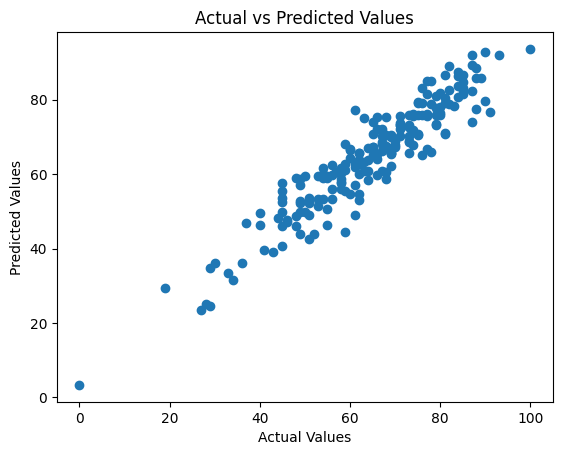

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual Values');
plt.ylabel('Predicted Values');
plt.title('Actual vs Predicted Values');

<Axes: xlabel='math score'>

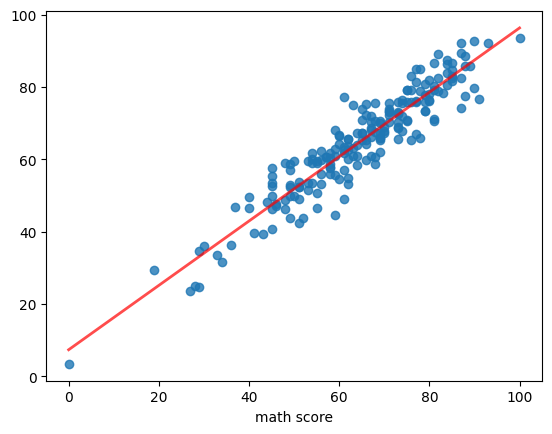

In [27]:
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red", "alpha": 0.7, "lw": 2})

## DIFFERENCE  BETWEEN ACTUAL VALUES AND PREDICTEDD VALUES

This helps you see how much your model’s predictions differ from the real scores for each student. The 'Difference' column shows the prediction error for every test sample.

- pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}): Makes a table with two columns—actual scores and predicted scores.
- pred_df['Difference'] = pred_df['Actual'] - pred_df['Predicted']: Adds a new column showing the difference between the actual and predicted values for each student.
- pred_df: Displays the table.

In [36]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df['Difference'] = pred_df['Actual'] - pred_df['Predicted']
pred_df

,Actual,Predicted,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
